In [106]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---
There are 10 questions, adding up to 100 points.

* Please SAVE your work continuously.
* When you are not sure if your code works, leave comments about what you are trying to do. Make it easy for me to give partial credit :-)

Best of luck!

---

### [Q1 5 points] Read in the file traffic.csv into a dataframe.

In [107]:
df = pd.read_csv('traffic.csv')
print df[:5]

   ID  Segment ID  Roadway Name        From            To Direction  \
0   1        2153  HUGUENOT AVE  WOODROW RD  STAFFORD AVE        NB   
1   1        2153  HUGUENOT AVE  WOODROW RD  STAFFORD AVE        NB   
2   1        2153  HUGUENOT AVE  WOODROW RD  STAFFORD AVE        NB   
3   1        2153  HUGUENOT AVE  WOODROW RD  STAFFORD AVE        NB   
4   1        2153  HUGUENOT AVE  WOODROW RD  STAFFORD AVE        NB   

         Date           Time  Count  Time 24 hr  
0  02/02/2013  12:00-1:00 AM  106.0           0  
1  02/02/2013    1:00-2:00AM   74.0           1  
2  02/02/2013    2:00-3:00AM   45.0           2  
3  02/02/2013    3:00-4:00AM   29.0           3  
4  02/02/2013    4:00-5:00AM   29.0           4  


### [Q2 7 points] Print the rows where the Count is at least 75% of the maximum traffic Count.

In [108]:
# Get the max traffic counts
max_counts = df['Count'].max()

# Get 75% of the maximum counts
max_75_percent_count = max_counts * 0.75

# Mask for where count is >= 75% of max count
mask_75_count = (df['Count'] >= max_75_percent_count)


# Apply the mask and print the rows
rows_75_count = df[mask_75_count]

print rows_75_count

        ID  Segment ID    Roadway Name           From             To  \
83623  238       70873  AMSTERDAM AVE    WEST 164 ST    WEST 165 ST    
83624  238       70873  AMSTERDAM AVE    WEST 164 ST    WEST 165 ST    
83647  238       70873  AMSTERDAM AVE    WEST 164 ST    WEST 165 ST    
83648  238       70873  AMSTERDAM AVE    WEST 164 ST    WEST 165 ST    

      Direction        Date         Time    Count  Time 24 hr  
83623        NB  09/30/2012  7:00-8:00AM  9112.83           7  
83624        NB  09/30/2012  8:00-9:00AM  7216.50           8  
83647        NB  10/01/2012  7:00-8:00AM  9226.33           7  
83648        NB  10/01/2012  8:00-9:00AM  7302.00           8  


### [Q3 7 points] Which Segment ID shows up the fewest times in the dataset?

In [109]:
# Get a eries of the Id Segments
series_segment_id = df['Segment ID']

# Get the value counts for the segments
series_segment_counts = series_segment_id.value_counts()

# Print the smallest value counts's index through idxmin 
print series_segment_counts.idxmin()

43527


### [Q4 11 points] How many distinct months show up in the data?

A row with a date of "02/03/2013" means that the month "02" shows up in the data. You need to output the number of distinct months in the data. (Obviously this can be at most 12, but perhaps it is less?)

In [110]:
def monthsOnly(s):
    '''s is a string with the first two elements representing the month'''
    # return only the month part of the string
    return s[:2]

# Get a series with the dates
series_dates = df['Date']

# Get just the months
series_month = series_dates.map(monthsOnly)

# Get just the unique months
series_unique_months = series_month.unique()

# Print the length of the series of unique months
print len(series_unique_months)

6


### [Q5 11 points] Top suffixes of roadway names.

Let's call the last word of a roadway name the "suffix" of the roadway name. For example,

* the suffix of "5 AVENUE" is "AVENUE"
* the suffix of "BROADWAY" is "BROADWAY"
* the suffix of "ATLANTIC AVE" is "AVE"

For each unique roadway name, figure out its suffix. Find the suffixes that occur at least 10 times (i.e., they are the suffix for at least 10 unique roadway names).

In [111]:
def roadwayOnly(s):
    '''s is a string that represents a roadway name'''
    
    # The suffix is always the last part of the string
    return s.split()[-1]

# Get a series of only the unique roadway names
series_roadways = df['Roadway Name'].drop_duplicates()

# Get only the suffixes
series_road_suffixes = series_roadways.map(roadwayOnly)

# Get the value counts for each suffix 
series_suffix_counts = series_road_suffixes.value_counts()

# Create a mask for values >=10
mask_atleast_10_suffix = (series_suffix_counts >= 10)

# Apply the mask and print the results
print series_suffix_counts[mask_atleast_10_suffix]

AVE       72
AVENUE    55
STREET    54
ROAD      17
ST        14
BLVD      11
Name: Roadway Name, dtype: int64


### [Q6 11 points] Most common pair of intersections

Create a column called "From To" combining information from both fields. For example,

* If "From" is "WOORDROW RD", and "To" is "STAFFORD AVE", then the "From To" column should be "WOODROW RD to STAFFORD AVE"

Now, figure out the "From To" pair that shows up for the most number of Roadway Names.

In [112]:
# Create a new column with string concatentation 
df['From To'] = df['From'] + ' to ' + df['To']

# Create a df with Roadway and From To
df_roadway_from_to = df[['Roadway Name', 'From To']]

# Get only the unique roadway names
df_unique_roadway_fromto = df_roadway_from_to.drop_duplicates('Roadway Name')

# Get the value counts of FromTo
series_fromto_counts = df_unique_roadway_fromto['From To'].value_counts()

# Print the max index
print series_fromto_counts.idxmax()

 EAST 172 STREET   to  EAST MT EDEN AVENUE 


### [Q7 11 points] Plot the top 10 Roadway Names with the most number of segments.

The plot's x-axis should be the roadway name, and the y-axis should be the number of segments associated with that Roadway Name.

Note: It's okay to have "BROADWAY" and "BROADWAY " (with the space) as different roadways.

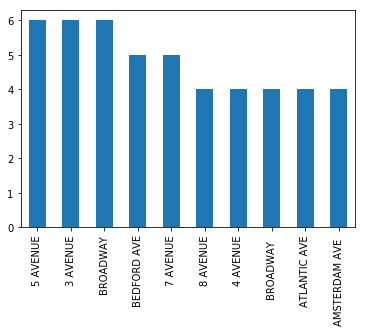

In [113]:
# Get the unique roadway and segment pairs
df_roadway_segments = df[['Roadway Name', 'Segment ID']].drop_duplicates()

# Get the value counts of the Roadway Name
series_roadway_counts = df_roadway_segments['Roadway Name'].value_counts()

# Plot the top 10
series_roadway_counts[:10].plot(kind='bar')

### [Q8 11 points] Plot the traffic volumes for BROADWAY and 5 AVENUE.

For each of these two roadways, get the average traffic counts for each "Time 24 hr" (averaged over all segments, and all directions). Now, create one plot where the x-axis is "Time 24 hr" and the y-axis is the average traffic count. Show the patterns for these roadways in the same plot.

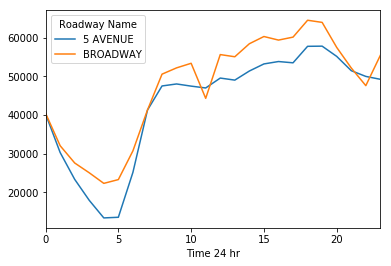

In [114]:
# Get only the two roadways
df_roadway_index = df.set_index('Roadway Name')

# Get only Boradway and 5 Ave
df_broadway_5ave = df_roadway_index.loc[['BROADWAY', '5 AVENUE']].reset_index()

# Create a pivot table with the counts as the value
pt_24time = pd.pivot_table(df_broadway_5ave, index='Roadway Name', columns='Time 24 hr', values='Count', aggfunc=sum)

# Plot the patterns
pt_24time.T.plot()

### [Q9 11 points] How many one-ways?

Let's say a one-way is a "From To" pair associated with only one "Direction." How many such one-way pairs are there?

In [115]:
# Get the fromto and direction
df_fromto_direction =  df[['Direction', 'From To']].drop_duplicates()

# The From To that only appears once means that there is only one direction
series_fromto_direction_counts = df_fromto_direction['From To'].value_counts()

# Create a mask for the the values that only appear once
mask_one_direction = (series_fromto_direction_counts == 1)

# Apply the mask
series_fromto_one_way = series_fromto_direction_counts[mask_one_direction]

# Print the number (len()) in the series
print len(series_fromto_one_way)

122


### [Q10 15 points] Peak traffic

* For each Roadway Name, aggregate the total traffic for each date (i.e., add up all traffic counts at all From/To pairs at all hours of the day).
* Then, for each Roadway Name, compute the ratio of the maximum to the minimum traffic. For example:
    * If total traffic on BROADWAY is 100 (Jan 1), 200, (Jan 2), 50 (Jan 3), and missing on all other days, then the ratio is 200/50 = 4.0
* Find the top 10 roads with the highest ratios of maximum to minimum traffic.

In [116]:
# Create a pivot table for raodway name and dates with the counts as the vaue
pt_peak = pd.pivot_table(df, index='Date', columns='Roadway Name', values='Count', aggfunc=sum)

# Function for dataframes
def ratio(s):
    '''s is a series of counts for each street'''
    return s.max() / s.min()

# Get a series of the roadway ratios
series_roadway_ratios = pt_peak.apply(ratio)

# Sort the ratios in descending order (most traffic)
series_top_10_traffic = series_roadway_ratios.sort_values(ascending=False)

# Print the top 10
print series_top_10_traffic[:10]

Roadway Name
10 AVENUE                27.502771
 VERMONT PLACE           25.125874
7 AVENUE                 19.889966
 VAN WYCK EXPRESSWAY     12.933715
150th ST                 12.088206
8 AVENUE                 12.007243
 JAMAICA AVENUE          10.012735
 ATLANTIC AVENUE          8.986712
BROADWAY                  8.356310
LIBERTY AVE               8.149518
dtype: float64
